For the Microsoft course 'Principles of Machine Learning' the final assessment is to create a linear regression model.

As our final assessment we were provided a data set and were to create a linear regression model that predicted the average monthly spend for an individual at a bike shop.

In this Jupyter Notebook I will be doing some exploratory data analysis. I will be doing so-called data wrangling or munging, where the "raw" data is transformed to another format, making it more valuable for machine learning and analytics. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config IPCompleter.greedy=True

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
# read into a dataframe
averageMonthlySpend = pd.read_csv('AdvWorksCusts.csv')
averageMonthlySpend.shape

(16519, 25)

There are 16,519 rows and 25 columns. There are 24 features and 1 label that we are trying to predict.  The label is the 'AveMonthSpend' column

In [3]:
averageMonthlySpend.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


I want to examine missing values. Failure to manage missing values before training a machine learning model can lead to biased training or actual failure.

In [4]:
averageMonthlySpend.isnull().sum()

CustomerID                  0
Title                   16431
FirstName                   0
MiddleName               6985
LastName                    0
Suffix                  16517
AddressLine1                0
AddressLine2            16243
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

When examining the missing values, the columns 'Title', 'Suffix', and 'AddressLine2' are almost empty. The column 'MiddleName' also has significant missing values. These columns are dropped and the missing values are checked again.

In [5]:
averageMonthlySpend = averageMonthlySpend.drop(['Title', 'MiddleName', 'Suffix', 'AddressLine2'], axis = 1)
averageMonthlySpend.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
dtype: int64

I wanted to get a count of records to check for duplicates. You can see that there are now 21 features given that we dropped 4 features.

In [6]:
print(averageMonthlySpend.shape)
print(averageMonthlySpend.CustomerID.unique().shape)

(16519, 21)
(16404,)


The field CustomerID field should be unique. We can see there are 16404 unique IDs with 16519 total records. These 115 duplicate records will be removed.

In [7]:
averageMonthlySpend.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
print(averageMonthlySpend.shape)
print(averageMonthlySpend.CustomerID.unique().shape)

(16404, 21)
(16404,)


I wanted to check the datatypes of our features. The columns that have the 'object' datatype do seem categorical in nature, and the columns with the 'int64' datatype do seem numerical in nature. Although, 'HomeOwnerFlag' is a boolean and 'NumberCarsOwned' has a numeric value, but both of these columns and a few others are much more categorical as features. These features and their data types will be cleaned up at the end of the notebook.

In [8]:
averageMonthlySpend.dtypes

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

I want to see the unique counts for particular categorical variables.  If the unique counts are high, it is challenging to extract valuable data insights.

In [9]:
averageMonthlySpend.apply(pd.Series.nunique)

CustomerID              16404
FirstName                 662
LastName                  363
AddressLine1            11871
City                      269
StateProvinceName          52
CountryRegionName           6
PostalCode                323
PhoneNumber              7949
BirthDate                7896
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             5
NumberChildrenAtHome        6
TotalChildren               6
YearlyIncome            15465
AveMonthSpend             152
BikeBuyer                   2
dtype: int64

The first name, last name, and phone number fields are not data points that I would want evaluated in predicting an average monthly spend. Those fields will be dropped.

The address field has an extreme high unique count for a categorical variable. It could be assumed that their would be some imbalance in category counts and some categories containing a small sample size. Feature engineering could allow the address to be a viable and strong feature e.g. converting the address to latitude and longitude and then pulling in socio-economic status from external data. Although, that feature engineering will not be performed here and the address field will be dropped.

In [10]:
averageMonthlySpend = averageMonthlySpend.drop(['FirstName', 'LastName', 'AddressLine1', 'PhoneNumber'], axis = 1)
averageMonthlySpend.apply(pd.Series.nunique)

CustomerID              16404
City                      269
StateProvinceName          52
CountryRegionName           6
PostalCode                323
BirthDate                7896
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             5
NumberChildrenAtHome        6
TotalChildren               6
YearlyIncome            15465
AveMonthSpend             152
BikeBuyer                   2
dtype: int64

I want to determine the age of an individual and modified the Birthdate to an age as today.

In [11]:
now = pd.Timestamp('now').strftime("%x")
averageMonthlySpend['dateForCalc'] = pd.to_datetime(now)

averageMonthlySpend['Age'] = (averageMonthlySpend['dateForCalc'].sub(pd.to_datetime(averageMonthlySpend['BirthDate']))).dt.days / 365.25
averageMonthlySpend['Age'] = averageMonthlySpend['Age'].astype(int)

averageMonthlySpend = averageMonthlySpend.drop(['dateForCalc', 'BirthDate'], axis = 1)

averageMonthlySpend.head()

,CustomerID,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,Rockhampton,Queensland,Australia,4700,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,53
1,11001,Seaford,Victoria,Australia,3198,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,54
2,11002,Hobart,Tasmania,Australia,7001,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,54
3,11003,North Ryde,New South Wales,Australia,2113,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,51
4,11004,Wollongong,New South Wales,Australia,2500,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,51


In [12]:
averageMonthlySpend.dtypes

CustomerID               int64
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
Age                      int64
dtype: object

I want to see a summary of the statistics and examine how centered the data is.  

In [13]:
averageMonthlySpend.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78128.531517,72.389905,0.332297,57.357169
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39726.533060,27.269568,0.471051,11.246324
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000,38.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47811.750000,52.000000,0.000000,49.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000,56.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105200.250000,84.000000,1.000000,65.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000,109.000000


There is some variance in our trailing columns when examining the standard deviations - YearlyIncome, AveMonthSpend, and Age. Recall, some of these columns are booleans represented as integers. Their is not much skew here - our mean and medians are lining up pretty well.

I wanted to take a look at a frequency table for our categorical variables. Examine the number of categories and the frequency within each.

In [14]:
def count_unique(averageMonthlySpend, columns):
    for column in columns:
        print('\nColumn: ' + column)
        print(averageMonthlySpend[column].value_counts())
        
categorical_columns = ['City', 'StateProvinceName', 'CountryRegionName', 'PostalCode', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer']

count_unique(averageMonthlySpend, categorical_columns)


Column: City
London              379
Paris               341
Beaverton           190
Burien              188
Chula Vista         185
Bellingham          183
Concord             183
Berkeley            177
Burbank             174
Beverly Hills       170
Cliffside           169
Burlingame          166
Bremerton           165
Bellflower          164
Berlin              159
Colma               150
Coronado            118
York                104
Shawnee             102
Cranbourne          101
Hamburg             101
Downey              100
Caloundra            98
Sydney               97
El Cajon             97
Geelong              97
Goulburn             96
Brisbane             96
Hervey Bay           95
Sunbury              94
                   ... 
Bradenton             1
Charlotte             1
Campbellsville        1
Monroe                1
Kenmore               1
Clarkston             1
Cedar Park            1
Biloxi                1
Carrollton            1
Chantilly             1
Co

Some of these variables have a large number categories. This can be an issue with a smaller size dataset.

The problem is having a large number of categories and some of them only containing a few samples, thus, statistical properties will be poorly determined.

There are also significant frequency imbalances. There are some categories that have a frequency within the 100's, if not 1000's, and others a singleton. Again, the statistical properties will be poorly determined.

Categories displaying imbalance and small sample sizes will be dropped.

In [15]:
averageMonthlySpend = averageMonthlySpend.drop(['City', 'StateProvinceName', 'PostalCode'], axis = 1)

categorical_columns = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer']

count_unique(averageMonthlySpend, categorical_columns)


Column: CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

Column: Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

Column: Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

Column: Gender
M    8290
F    8114
Name: Gender, dtype: int64

Column: MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

Column: HomeOwnerFlag
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64

Column: NumberCarsOwned
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

Column: NumberCarsOwned
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64



Now that I have looked at frequency numbers, I wanted to take a look at frequency visualizations. 

Examine the distributions visually, as well as get familiar with some the libraries that are offered for statistical analysis.

Let's start with simple histograms of features with a smaller number of categories.

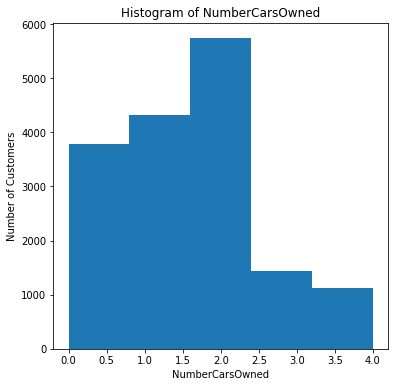

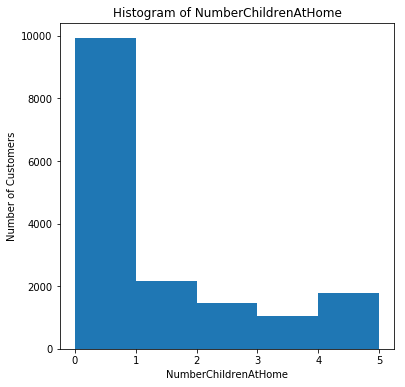

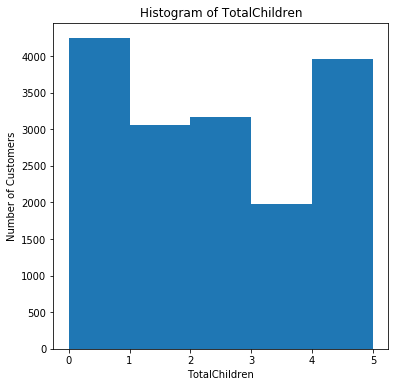

In [16]:
def plot_histogram(averageMonthlySpend, columns, bins = 5):
    for column in columns:
        figure = plt.figure(figsize=(6,6))  # 6x6 inch figure
        axis = figure.gca()  # defining and getting the axis
        averageMonthlySpend[column].plot.hist(ax = axis, bins = bins)  # Use the plot.hist method on subset of the data frame
        axis.set_title('Histogram of ' + column)  # Give the plot a main title
        axis.set_xlabel(column)  # set text for the x axis
        axis.set_ylabel('Number of Customers')  # set the text for the y axis
        plt.show()
        
numericColumns = ['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']  # parameter for plot_histogram function

plot_histogram(averageMonthlySpend, numericColumns)  # call function

The plots show a wide range of frequencies and are not the greatest distributions. This is something that I am willing to accept here. If the frequency counts were extremely low this would pose a problem.

The YearlyIncome contains a high unique count. With so many data points I wanted to examine the frequency visually as a discrete chart and a continuous curve.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


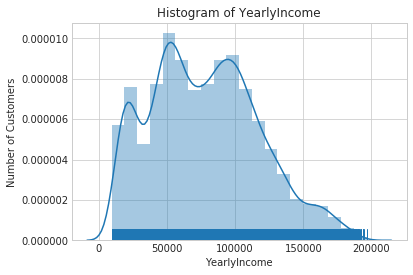

In [17]:
def plot_density_hist(averageMonthlySpend, columns, bins = 20, hist = True):
    for column in columns:
        sns.set_style('whitegrid')
        sns.distplot(averageMonthlySpend[column], bins = bins, rug = True, hist = hist)  # display the rug at horizontal and histogram background
        plt.title('Histogram of ' + column)
        plt.xlabel(column)
        plt.ylabel('Number of Customers')
        plt.show()
        
numericColumns = ['YearlyIncome']

plot_density_hist(averageMonthlySpend, numericColumns)

The Yearly Income displays a decent distribution. I am satisfied with this sample. A feature transformation could have taken place here to further normalize the set and create better predictability.

It seems natural that their would be some correlation between Yearly Income and Average Monthly Spend. I wanted to get a visualization of the two fields plotted and get a broad look at the graph.

The scatter plot below displays some density visually, which led me to further plotting a density plot with the Seaborn package.

There is some positive correlation between the variables - as you would expect. You can see by the two most dense bands that, generally, individuals around 100K per year aren't spending that much more than individuals making 60K per year. But, around that salary is also where you see larger spending routinely taking place.

You can see that individuals making 125K or more are spending more, so much more that lower spending per month, generally, drops off there.

Higher spenders, those above 100 per month, making atleast 75K per year, are almost spending in "tiers". There are 4 distinct "bands" near the top of the graph.

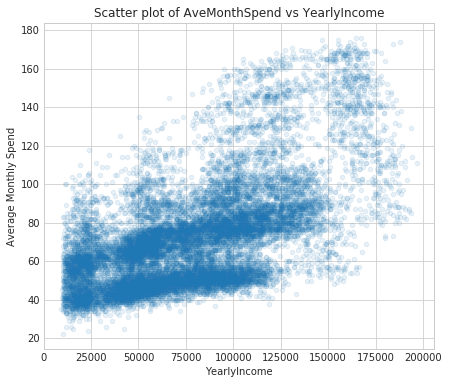

In [18]:
def plot_scatter(averageMonthlySpend, columns, label = 'AveMonthSpend', alpha = 1.0):
    for column in columns:
        figure = plt.figure(figsize=(7,6))  # 7x6 inch plot
        axis = figure.gca()  # define and get axis
        averageMonthlySpend.plot.scatter(x = column, y = label, ax = axis, alpha = alpha)
        axis.set_title('Scatter plot of ' + label + ' vs ' + column)
        axis.set_xlabel(column)
        axis.set_ylabel('Average Monthly Spend')
        plt.show()
        
numericColumns = ['YearlyIncome']

plot_scatter(averageMonthlySpend, numericColumns, alpha = 0.1)

Below you can see the density plot. You can see the close resemblance between the scatter plot above and density plot. 

I was impressed with the Seaborn package displaying the frequency distributions on the axes. You can see that our Yearly Income has a little less skew than our Average Monthly spend. It's easy to see the intersection of the highest frequencies displaying the darkest, most dense image. 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


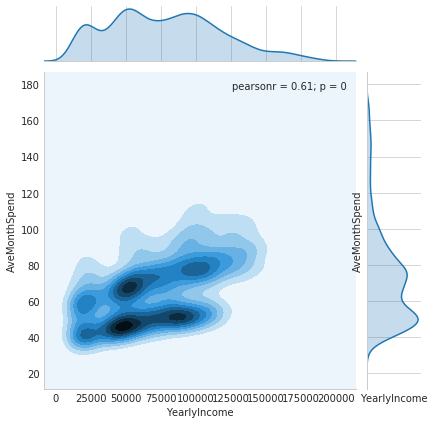

In [19]:
def plot_density(averageMonthlySpend, columns, label = 'AveMonthSpend', kind = 'kde'):
    for column in columns:
        sns.set_style('whitegrid')
        sns.jointplot(column, label, data = averageMonthlySpend, kind = kind)
        plt.xlabel(column)
        plt.ylabel(label)
        plt.show()
        
plot_density(averageMonthlySpend, numericColumns)

The continuous frequency curves that we see on the outside axes are also known as Kernel Density plots. 

Looking at the vertical Average Monthly Spend frequency curve, if you can imagine the curve reflected about the vertical axis it sits on, the entire shape would somewhat resemble a violin. This is another visualization of density.

These violin plots are arranged side-by-side with data from numerical variables displayed according to category. Given these are density plots, the area of each violin is the same on each plot display. I have selected our label as the numerical variable plotted against the various categories. Within the center of a thicker black bar you see a white dot - this is your median or your 50th percentile. The thick black bar tapers down to a thinner black line. The bottom and top of the thick black bar represent your 25th and 75th percentile. This is known as a box-plot in statistics - it lies at the center of the violin plots.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


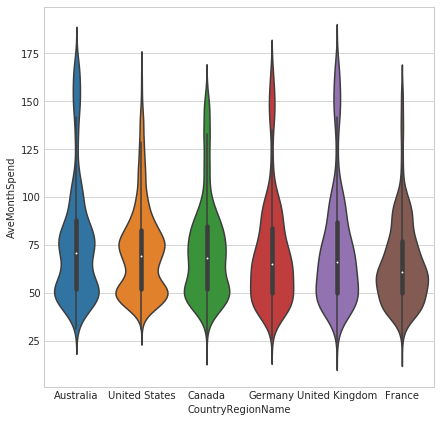

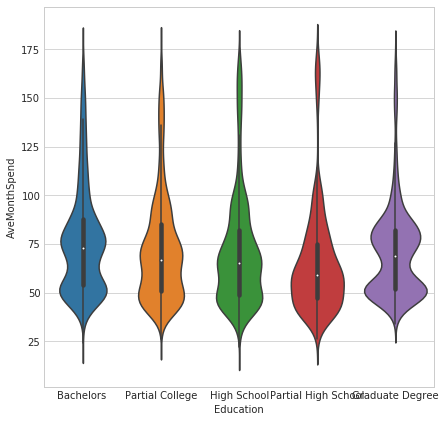

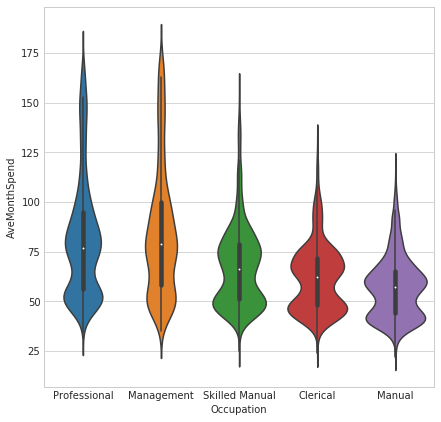

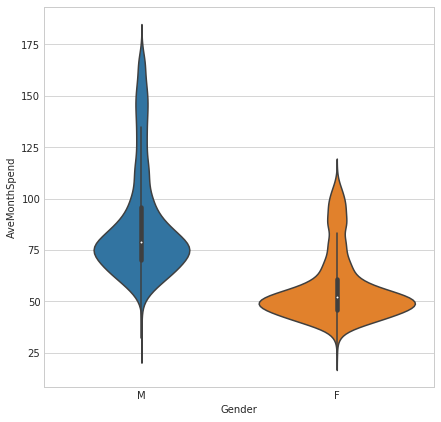

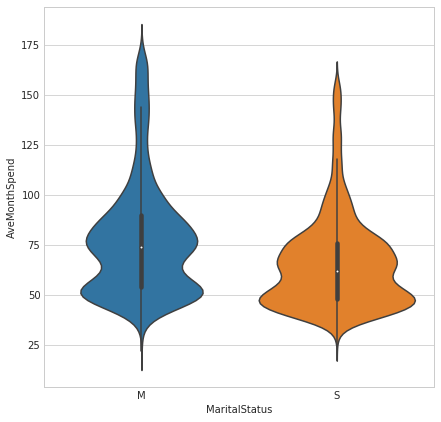

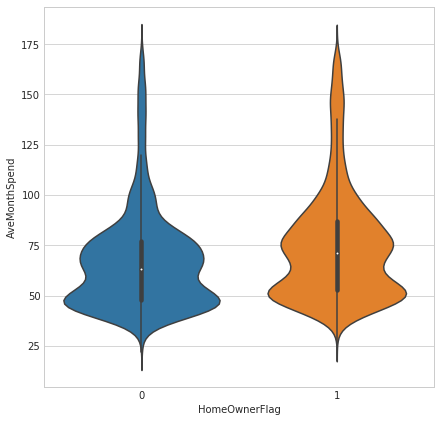

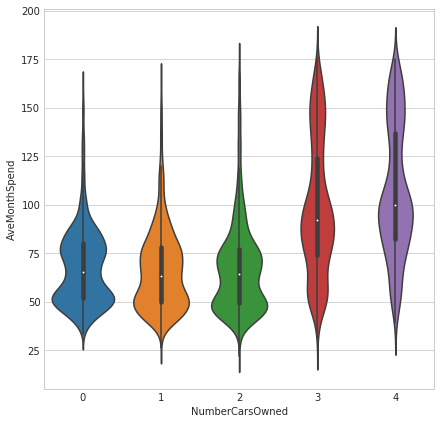

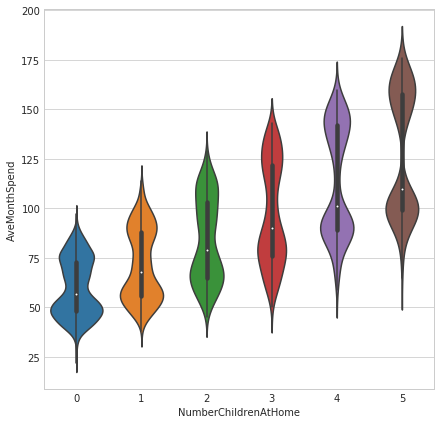

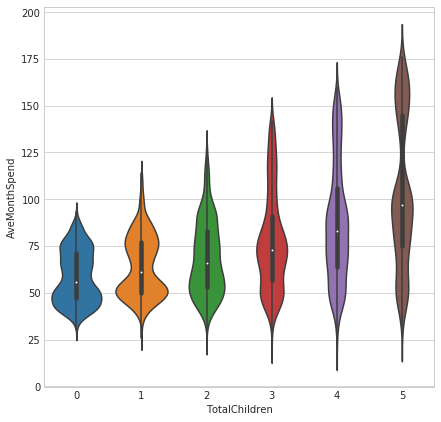

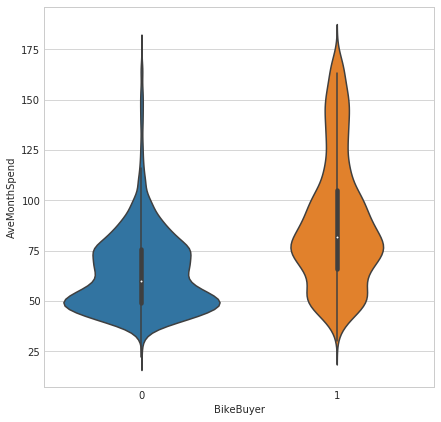

In [20]:
def violin_plot(averageMonthlySpend, columns, label = 'AveMonthSpend'):
    for column in columns:
        plt.figure(figsize = (7, 7))
        sns.set_style('whitegrid')
        sns.violinplot(column, label, data = averageMonthlySpend)
        plt.xlabel(column)
        plt.ylabel(label)
        plt.show()
        
category_columns = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer']
        
violin_plot(averageMonthlySpend, category_columns)

Examining the boxplots we can see the categories within Country Region, Home Ownership, and Education aren't really affecting the Average Monthly spend. Marital Status and Number of Cars owned has some marginal influence on Average Monthly spend. Whereas, Occupation, Gender, Bike Buyer, Children at Home, and Total Children are clearly showing distinction within the categories and an influence on Average Monthly Spend.

Examining the Number of Cars Owned, there is distinction between the labels for those owning 0-2 cars and those owning 3-4 cars - these buckets share approximately the same distributions and box plot statistics. Combining the categories into two buckets may introduce more distinction and provide a better model.

I want to examine the frequency counts within the categories to asses numbers.

In [21]:
averageMonthlySpend['NumberCarsOwned'].value_counts()

2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

There are low counts for those owning 3, or 4 cars. Given the similarity between those owning 0-2, and those owning 3-4, if we were to aggregate them, we can get higher counts amongst distinct categories.

I am going to aggregate the categories down to 2 categorizations and check the count.

In [22]:
carsOwnedCategories = {0:"zero_two", 1:"zero_two", 2:"zero_two", 3:"three_four", 4:"three_four"}

averageMonthlySpend['NumberCarsOwned'] = [carsOwnedCategories[x] for x in averageMonthlySpend['NumberCarsOwned']]

averageMonthlySpend['NumberCarsOwned'].value_counts()

zero_two      13848
three_four     2556
Name: NumberCarsOwned, dtype: int64

This looks accurate. 

Aggregation can help manage small sample sizes.

Let's take a look at the frequencies and box plots now.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


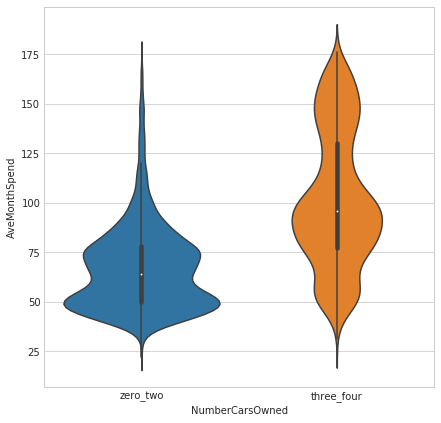

In [23]:
def violin_plot(averageMonthlySpend, columns, label = 'AveMonthSpend'):
    for column in columns:
        plt.figure(figsize = (7, 7))
        sns.set_style('whitegrid')
        sns.violinplot(column, label, data = averageMonthlySpend)
        plt.xlabel(column)
        plt.ylabel(label)
        plt.show()

category_columns = ['NumberCarsOwned']
        
violin_plot(averageMonthlySpend, category_columns)

This looks as expected as well - distinct frequencies and statistics for the categorizations.

Let's look at the head of the data just for review. Number of Cars Owned should display the new categories.

In [24]:
averageMonthlySpend.head()

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,Australia,Bachelors,Professional,M,M,1,zero_two,0,2,137947,89,0,53
1,11001,Australia,Bachelors,Professional,M,S,0,zero_two,3,3,101141,117,1,54
2,11002,Australia,Bachelors,Professional,M,M,1,zero_two,3,3,91945,123,0,54
3,11003,Australia,Bachelors,Professional,F,S,0,zero_two,0,0,86688,50,0,51
4,11004,Australia,Bachelors,Professional,F,S,1,three_four,5,5,92771,95,1,51


I want to examine the frequency of our label. This is what we are trying to predict. If we can transform the data to better make predictions this is advantageous.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


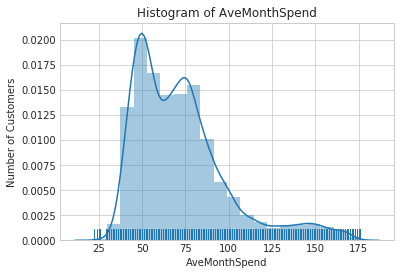

In [25]:
numericColumns = ['AveMonthSpend']

plot_density_hist(averageMonthlySpend, numericColumns)

The density of the label does show some right skew, and multi-modal behavior. Applying the logarithm function to the data can help to shape our distribution closer to a Normal/Gaussian distribution,and having data closer to a Normal distribution increases predictability.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


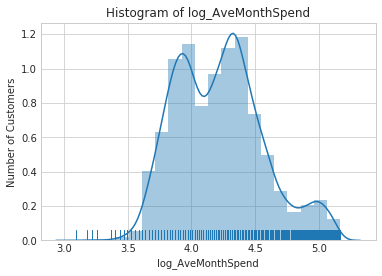

In [26]:
averageMonthlySpend['log_AveMonthSpend'] = np.log(averageMonthlySpend['AveMonthSpend'])

numericColumns = ['log_AveMonthSpend']

plot_density_hist(averageMonthlySpend, numericColumns)

The distribution does now closer resemble a Normal distribution - the bell curve. Although, applying the log function did somewhat amplify the multi-modal behavior.

Note, I am going to have to "reverse" this transformation, as the model is now predicting the logarithm of the Average Monthly Spend, and not the pure Average Monthly Spend values.

Let's now clean up our categorical variables. You can see below we have abbreviations for Married, Single, Male and Female - these could be more clear. The Home Owner Flag and Bike Buyer categories are booleans that display a 0 or 1 - these could be stated with ownership terms. Also, lets change the categories with numerical values to the numerical name, indicating these are categorical features and not numerical features. We will confirm our counts.

In [27]:
print(averageMonthlySpend['Education'].unique())
print(averageMonthlySpend['CountryRegionName'].unique())
print(averageMonthlySpend['Occupation'].unique())
print(averageMonthlySpend['Gender'].unique())
print(averageMonthlySpend['MaritalStatus'].unique())
print(averageMonthlySpend['HomeOwnerFlag'].unique())
print(averageMonthlySpend['NumberCarsOwned'].unique())
print(averageMonthlySpend['NumberChildrenAtHome'].unique())
print(averageMonthlySpend['TotalChildren'].unique())
print(averageMonthlySpend['BikeBuyer'].unique())

['Bachelors ' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
['Australia' 'United States' 'Canada' 'Germany' 'United Kingdom' 'France']
['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
['M' 'F']
['M' 'S']
[1 0]
['zero_two' 'three_four']
[0 3 5 4 1 2]
[2 3 0 5 4 1]
[0 1]


In [28]:
GenderCategories = {'M':"Male", 'F':"Female"}

averageMonthlySpend['Gender'] = [GenderCategories[x] for x in averageMonthlySpend['Gender']]

averageMonthlySpend['Gender'].value_counts()

Male      8290
Female    8114
Name: Gender, dtype: int64

In [29]:
MaritalStatusCategories = {'M':"Married", 'S':"Single"}

averageMonthlySpend['MaritalStatus'] = [MaritalStatusCategories[x] for x in averageMonthlySpend['MaritalStatus']]

averageMonthlySpend['MaritalStatus'].value_counts()

Married    8852
Single     7552
Name: MaritalStatus, dtype: int64

In [30]:
HomeOwnerFlagCategories = {1:"HomeOwner", 0:"NotHomeOwner"}

averageMonthlySpend['HomeOwnerFlag'] = [HomeOwnerFlagCategories[x] for x in averageMonthlySpend['HomeOwnerFlag']]

averageMonthlySpend['HomeOwnerFlag'].value_counts()

HomeOwner       11058
NotHomeOwner     5346
Name: HomeOwnerFlag, dtype: int64

In [31]:
NumberChildrenAtHomeCategories = {0:"Zero", 1:"One", 2:"Two", 3:"Three", 4:"Four", 5:"Five"}

averageMonthlySpend['NumberChildrenAtHome'] = [NumberChildrenAtHomeCategories[x] for x in averageMonthlySpend['NumberChildrenAtHome']]

averageMonthlySpend['NumberChildrenAtHome'].value_counts()

Zero     9924
One      2180
Two      1455
Three    1057
Four      943
Five      845
Name: NumberChildrenAtHome, dtype: int64

In [32]:
TotalChildrenCategories = {0:"Zero", 1:"One", 2:"Two", 3:"Three", 4:"Four", 5:"Five"}

averageMonthlySpend['TotalChildren'] = [TotalChildrenCategories[x] for x in averageMonthlySpend['TotalChildren']]

averageMonthlySpend['TotalChildren'].value_counts()

Zero     4244
Two      3166
One      3054
Four     2250
Three    1977
Five     1713
Name: TotalChildren, dtype: int64

In [33]:
BikeBuyerCategories = {0:"NotPurchaseBike", 1:"PurchaseBike"}

averageMonthlySpend['BikeBuyer'] = [BikeBuyerCategories[x] for x in averageMonthlySpend['BikeBuyer']]

averageMonthlySpend['BikeBuyer'].value_counts()

NotPurchaseBike    10953
PurchaseBike        5451
Name: BikeBuyer, dtype: int64

Let's do a quick review and confirm the categorical features data types are correct.

In [34]:
print(averageMonthlySpend['Education'].unique())
print(averageMonthlySpend['CountryRegionName'].unique())
print(averageMonthlySpend['Occupation'].unique())
print(averageMonthlySpend['Gender'].unique())
print(averageMonthlySpend['MaritalStatus'].unique())
print(averageMonthlySpend['HomeOwnerFlag'].unique())
print(averageMonthlySpend['NumberCarsOwned'].unique())
print(averageMonthlySpend['NumberChildrenAtHome'].unique())
print(averageMonthlySpend['TotalChildren'].unique())
print(averageMonthlySpend['BikeBuyer'].unique())

['Bachelors ' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
['Australia' 'United States' 'Canada' 'Germany' 'United Kingdom' 'France']
['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
['Male' 'Female']
['Married' 'Single']
['HomeOwner' 'NotHomeOwner']
['zero_two' 'three_four']
['Zero' 'Three' 'Five' 'Four' 'One' 'Two']
['Two' 'Three' 'Zero' 'Five' 'Four' 'One']
['NotPurchaseBike' 'PurchaseBike']


Now when I examine our feature data types, the categorical features are objects and the numerical features are of numerical data types.

In [35]:
averageMonthlySpend.dtypes

CustomerID                int64
CountryRegionName        object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag            object
NumberCarsOwned          object
NumberChildrenAtHome     object
TotalChildren            object
YearlyIncome              int64
AveMonthSpend             int64
BikeBuyer                object
Age                       int64
log_AveMonthSpend       float64
dtype: object

In [36]:
averageMonthlySpend.head()

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age,log_AveMonthSpend
0,11000,Australia,Bachelors,Professional,Male,Married,HomeOwner,zero_two,Zero,Two,137947,89,NotPurchaseBike,53,4.488636
1,11001,Australia,Bachelors,Professional,Male,Single,NotHomeOwner,zero_two,Three,Three,101141,117,PurchaseBike,54,4.762174
2,11002,Australia,Bachelors,Professional,Male,Married,HomeOwner,zero_two,Three,Three,91945,123,NotPurchaseBike,54,4.812184
3,11003,Australia,Bachelors,Professional,Female,Single,NotHomeOwner,zero_two,Zero,Zero,86688,50,NotPurchaseBike,51,3.912023
4,11004,Australia,Bachelors,Professional,Female,Single,HomeOwner,three_four,Five,Five,92771,95,PurchaseBike,51,4.553877


This concludes the exploratory data analysis. We are ready to deliver this data as input to our machine learning model.

We will export as a CSV file.

In [37]:
# Let's save the dataframe to a csv file
averageMonthlySpend.to_csv('averageMonthlySpendPrepared.csv', index = False, header = True)